# 4章

## 数値微分

### 数値微分の例

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

$$y = 0.01x^2 + 0.1x$$ という関数の数値微分を考える。

In [2]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [11]:
import numpy as np
import matplotlib.pyplot as plt

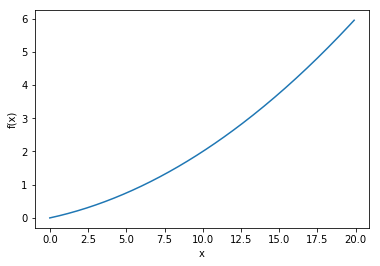

In [4]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [5]:
numerical_diff(function_1, 5)

0.1999999999990898

In [6]:
numerical_diff(function_1, 10)

0.2999999999986347

In [7]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


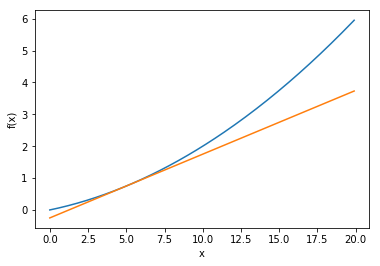

In [8]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


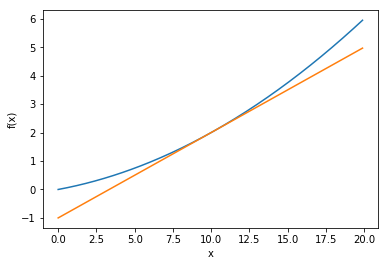

In [9]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 偏微分

$$f(x_0, x1) = x_0^2 + x_1^2$$ という関数の偏微分を考える。

In [1]:
def function_2(x):
    return np.sum(x ** 2)

$x_0 = 3$ 、 $x_1 = 4$ のときの $x_0$ に対する偏微分を求める。

In [4]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_0 = 3$ 、 $x_1 = 4$ のときの $x_1$ に対する偏微分を求める。

In [5]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 勾配

In [12]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
    return grad

In [13]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [14]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [16]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 勾配法

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

$f(x_0, x_1) = x_0^2 + x_1^2$ の最小値を勾配法を使って求める。

In [18]:
def function_2(x):
    return x[0]**2+x[1]**2

In [21]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

学習率は大きすぎても小さすぎてもうまくいかない。

In [22]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [23]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])